In [165]:
import xarray as xr
import pandas as pd
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns



In [53]:
df=pd.read_csv('dataframe_of_nothern_Ukraine.csv',delimiter=',',index_col=0 )
df=df[(df['lon']>23.5) & (df['lon']<29.55) & (df['lat']>50.5) & (df['lat']<52)]

d1=df[ (df['lat']==51.75) & (df['lon']==23.75) ]
d1

,time,lon,lat,no2,o3,so2,pm2.5,pm10,co
2576,1,23.75,51.75,4.711908,51.553411,2.401234,9.248417,12.351810,185.938477
2577,2,23.75,51.75,6.672050,46.996750,3.451919,17.601891,23.520398,225.714315
2578,3,23.75,51.75,8.941137,41.624018,3.784783,16.831771,21.090757,240.643168
2579,4,23.75,51.75,10.849893,40.627284,6.811707,30.603221,39.304944,322.964640
2580,5,23.75,51.75,4.367971,59.191040,1.967694,6.767345,9.922366,192.327454
...,...,...,...,...,...,...,...,...,...
2663,88,23.75,51.75,2.784445,72.439138,3.062533,6.394257,8.649928,145.270030
2664,89,23.75,51.75,3.303068,76.702627,2.680770,7.800020,9.007910,181.546488
2665,90,23.75,51.75,3.394346,56.460551,1.741416,8.097721,10.260835,169.729574
2666,91,23.75,51.75,1.243193,57.585114,1.048023,5.143442,5.530619,150.894409


In [54]:

d2=df[ (df['lat']==51.25) & (df['lon']==23.75) ]
d2

,time,lon,lat,no2,o3,so2,pm2.5,pm10,co
3036,1,23.75,51.25,4.840130,48.524028,2.717281,9.012988,11.661130,185.316935
3037,2,23.75,51.25,6.837524,44.847107,4.719621,18.235998,25.784821,225.869507
3038,3,23.75,51.25,10.987905,37.628128,4.515273,21.235669,26.101789,257.875081
3039,4,23.75,51.25,11.166643,43.213018,8.834831,33.463201,43.322795,321.567342
3040,5,23.75,51.25,3.937010,59.098231,1.823967,8.118919,12.774082,193.354574
...,...,...,...,...,...,...,...,...,...
3123,88,23.75,51.25,2.898940,73.561569,3.122199,7.098291,10.249259,140.762451
3124,89,23.75,51.25,3.070972,75.323029,2.403116,6.981778,7.901318,169.351176
3125,90,23.75,51.25,2.476567,58.476939,1.795598,7.614861,10.490540,164.154378
3126,91,23.75,51.25,1.432638,54.677755,1.070145,4.985533,5.358394,152.036112


In [55]:
d3=df[ (df['lat']==50.75) & (df['lon']==23.75) ]
d3

,time,lon,lat,no2,o3,so2,pm2.5,pm10,co
3496,1,23.75,50.75,6.829152,41.789032,3.133268,9.386179,12.554518,197.029358
3497,2,23.75,50.75,8.563565,42.982829,5.410757,19.147448,24.766518,236.159058
3498,3,23.75,50.75,11.538144,42.790924,4.868828,24.276563,28.554876,277.270854
3499,4,23.75,50.75,11.225159,47.781901,7.526946,33.165901,43.693609,318.889628
3500,5,23.75,50.75,5.430863,56.562063,2.624227,10.072824,14.968698,205.079386
...,...,...,...,...,...,...,...,...,...
3583,88,23.75,50.75,3.969422,73.893148,3.325564,6.961477,9.153272,143.940196
3584,89,23.75,50.75,4.487466,69.586502,2.836430,6.933515,8.315390,163.794230
3585,90,23.75,50.75,3.832836,57.775538,2.488466,8.341197,10.290483,169.182515
3586,91,23.75,50.75,2.142337,56.235779,1.162519,4.458217,5.089073,156.776866


In [56]:
d4=df[ (df['lat']==51.75) & (df['lon']==24.25) ]
d5=df[ (df['lat']==51.25) & (df['lon']==24.25) ]
d6=df[ (df['lat']==50.75) & (df['lon']==24.25) ]

d7=df[ (df['lat']==51.75) & (df['lon']==24.75) ]
d8=df[ (df['lat']==51.25) & (df['lon']==24.75) ]
d9=df[ (df['lat']==50.75) & (df['lon']==24.75) ]

d10=df[ (df['lat']==51.75) & (df['lon']==25.25) ]
d11=df[ (df['lat']==51.25) & (df['lon']==25.25) ]
d12=df[ (df['lat']==50.75) & (df['lon']==25.25) ]

d13=df[ (df['lat']==51.75) & (df['lon']==25.75) ]
d14=df[ (df['lat']==51.25) & (df['lon']==25.75) ]
d15=df[ (df['lat']==50.75) & (df['lon']==25.75) ]

d16=df[ (df['lat']==51.75) & (df['lon']==26.25) ]
d17=df[ (df['lat']==51.25) & (df['lon']==26.25) ]
d18=df[ (df['lat']==50.75) & (df['lon']==26.25) ]

d19=df[ (df['lat']==51.75) & (df['lon']==26.75) ]
d20=df[ (df['lat']==51.25) & (df['lon']==26.75) ]
d21=df[ (df['lat']==50.75) & (df['lon']==26.75) ]

d22=df[ (df['lat']==51.75) & (df['lon']==27.25) ]
d23=df[ (df['lat']==51.25) & (df['lon']==27.25) ]
d24=df[ (df['lat']==50.75) & (df['lon']==27.25) ]

d25=df[ (df['lat']==51.75) & (df['lon']==27.75) ]
d26=df[ (df['lat']==51.25) & (df['lon']==27.75) ]
d27=df[ (df['lat']==50.75) & (df['lon']==27.75) ]

d28=df[ (df['lat']==51.75) & (df['lon']==28.25) ]
d29=df[ (df['lat']==51.25) & (df['lon']==28.25) ]
d30=df[ (df['lat']==50.75) & (df['lon']==28.25) ]

d31=df[ (df['lat']==51.75) & (df['lon']==28.75) ]
d32=df[ (df['lat']==51.25) & (df['lon']==28.75) ]
d33=df[ (df['lat']==50.75) & (df['lon']==28.75) ]

d34=df[ (df['lat']==51.75) & (df['lon']==29.25) ]
d35=df[ (df['lat']==51.25) & (df['lon']==29.25) ]
d36=df[ (df['lat']==50.75) & (df['lon']==29.25) ]

In [57]:
frames=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36]
df_all = pd.concat(frames)

df_all.to_csv('data_of_copernicus.csv')

In [121]:
df2=pd.read_csv('sdfsfsd.csv',delimiter=',',index_col=0)
df3=pd.read_csv('data_of_copernicus.csv',delimiter=',',index_col=0)
df3

,time,lon,lat,no2,o3,so2,pm2.5,pm10,co
2576,1,23.75,51.75,4.711908,51.553411,2.401234,9.248417,12.351810,185.938477
2577,2,23.75,51.75,6.672050,46.996750,3.451919,17.601891,23.520398,225.714315
2578,3,23.75,51.75,8.941137,41.624018,3.784783,16.831771,21.090757,240.643168
2579,4,23.75,51.75,10.849893,40.627284,6.811707,30.603221,39.304944,322.964640
2580,5,23.75,51.75,4.367971,59.191040,1.967694,6.767345,9.922366,192.327454
...,...,...,...,...,...,...,...,...,...
74423,88,29.25,50.75,2.374783,63.589274,0.443204,5.575825,6.442769,141.999288
74424,89,29.25,50.75,2.250813,55.532491,0.304400,4.095932,4.510385,142.136587
74425,90,29.25,50.75,1.334874,67.426381,0.322781,4.207631,4.545102,145.511047
74426,91,29.25,50.75,1.308244,59.159719,0.302089,3.470493,3.625675,143.809682


In [112]:
df2

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS2M
0,5.65,0.05,92.97,0.25,101.22,2.97
1,7.78,-0.69,91.62,0.19,101.08,4.43
2,6.35,-2.21,92.66,0.16,100.83,1.99
3,4.91,-0.49,94.47,0.42,99.36,4.11
4,2.52,-3.39,81.22,0.41,99.75,2.61
...,...,...,...,...,...,...
3307,20.41,9.20,85.01,4.26,99.61,1.49
3308,19.88,12.81,89.09,19.11,99.27,1.77
3309,18.63,11.64,84.04,3.05,99.19,3.31
3310,14.80,9.72,90.18,27.87,99.40,2.48


In [122]:
tmax=[]
tmax=df2['T2M_MAX']
tmax=np.array(tmax)
tmin=[]
tmin=df2['T2M_MIN']
tmin=np.array(tmin)
rh2m=np.array(df2['RH2M'])
precto=np.array(df2['PRECTOTCORR'])
ps=np.array(df2['PS'])
ws=np.array(df2['WS2M'])

In [130]:
df3['tmax']=tmax
df3['tmin']=tmin
df3['hum']=rh2m
df3['opady']=precto
df3['tysk']=ps
df3['wind']=ws
df3.reset_index()

,index,time,lon,lat,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
0,2576,1,23.75,51.75,4.711908,51.553411,2.401234,9.248417,12.351810,185.938477,5.65,0.05,92.97,0.25,101.22,2.97
1,2577,2,23.75,51.75,6.672050,46.996750,3.451919,17.601891,23.520398,225.714315,7.78,-0.69,91.62,0.19,101.08,4.43
2,2578,3,23.75,51.75,8.941137,41.624018,3.784783,16.831771,21.090757,240.643168,6.35,-2.21,92.66,0.16,100.83,1.99
3,2579,4,23.75,51.75,10.849893,40.627284,6.811707,30.603221,39.304944,322.964640,4.91,-0.49,94.47,0.42,99.36,4.11
4,2580,5,23.75,51.75,4.367971,59.191040,1.967694,6.767345,9.922366,192.327454,2.52,-3.39,81.22,0.41,99.75,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,74423,88,29.25,50.75,2.374783,63.589274,0.443204,5.575825,6.442769,141.999288,20.41,9.20,85.01,4.26,99.61,1.49
3308,74424,89,29.25,50.75,2.250813,55.532491,0.304400,4.095932,4.510385,142.136587,19.88,12.81,89.09,19.11,99.27,1.77
3309,74425,90,29.25,50.75,1.334874,67.426381,0.322781,4.207631,4.545102,145.511047,18.63,11.64,84.04,3.05,99.19,3.31
3310,74426,91,29.25,50.75,1.308244,59.159719,0.302089,3.470493,3.625675,143.809682,14.80,9.72,90.18,27.87,99.40,2.48


TypeError: to_csv() got an unexpected keyword argument 'index_col'

In [167]:
dff=pd.read_csv('atlast_data.csv',index_col=0)
dff

,time,lon,lat,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
2576,1,23.75,51.75,4.711908,51.553411,2.401234,9.248417,12.351810,185.938477,5.65,0.05,92.97,0.25,101.22,2.97
2577,2,23.75,51.75,6.672050,46.996750,3.451919,17.601891,23.520398,225.714315,7.78,-0.69,91.62,0.19,101.08,4.43
2578,3,23.75,51.75,8.941137,41.624018,3.784783,16.831771,21.090757,240.643168,6.35,-2.21,92.66,0.16,100.83,1.99
2579,4,23.75,51.75,10.849893,40.627284,6.811707,30.603221,39.304944,322.964640,4.91,-0.49,94.47,0.42,99.36,4.11
2580,5,23.75,51.75,4.367971,59.191040,1.967694,6.767345,9.922366,192.327454,2.52,-3.39,81.22,0.41,99.75,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74423,88,29.25,50.75,2.374783,63.589274,0.443204,5.575825,6.442769,141.999288,20.41,9.20,85.01,4.26,99.61,1.49
74424,89,29.25,50.75,2.250813,55.532491,0.304400,4.095932,4.510385,142.136587,19.88,12.81,89.09,19.11,99.27,1.77
74425,90,29.25,50.75,1.334874,67.426381,0.322781,4.207631,4.545102,145.511047,18.63,11.64,84.04,3.05,99.19,3.31
74426,91,29.25,50.75,1.308244,59.159719,0.302089,3.470493,3.625675,143.809682,14.80,9.72,90.18,27.87,99.40,2.48


In [169]:
cor=dff.corr()
cor

,time,lon,lat,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
time,1.000000e+00,6.927895e-16,-1.080034e-15,-0.415741,0.387441,-0.240323,-0.368899,-0.390421,-0.605185,0.826676,0.846596,-0.440903,0.224874,-0.222992,-0.080717
lon,6.927895e-16,1.000000e+00,-1.323062e-13,-0.424547,0.030846,-0.461588,-0.207922,-0.254245,-0.258727,-0.042636,-0.032703,0.175312,0.085854,0.094838,-0.096535
lat,-1.080034e-15,-1.323062e-13,1.000000e+00,-0.188201,0.042263,-0.147747,-0.097050,-0.086878,-0.051185,-0.007945,0.002081,0.045270,-0.023346,0.340029,-0.002991
no2,-4.157407e-01,-4.245472e-01,-1.882012e-01,1.000000,-0.521072,0.726618,0.624651,0.651734,0.751877,-0.277203,-0.243154,0.308719,-0.064895,-0.005493,0.074401
o3,3.874413e-01,3.084573e-02,4.226300e-02,-0.521072,1.000000,-0.059292,-0.308254,-0.297094,-0.510993,0.349467,0.175435,-0.673717,-0.169933,-0.075370,0.313442
so2,-2.403226e-01,-4.615877e-01,-1.477465e-01,0.726618,-0.059292,1.000000,0.687509,0.715760,0.611125,-0.049439,-0.159459,-0.013148,-0.183186,-0.060192,0.199419
pm2.5,-3.688992e-01,-2.079217e-01,-9.704955e-02,0.624651,-0.308254,0.687509,1.000000,0.989233,0.782036,-0.012987,-0.153268,0.282630,-0.116184,0.132733,-0.069917
pm10,-3.904206e-01,-2.542448e-01,-8.687757e-02,0.651734,-0.297094,0.715760,0.989233,1.000000,0.777753,-0.032763,-0.179913,0.249959,-0.150461,0.143303,-0.046335
co,-6.051847e-01,-2.587266e-01,-5.118523e-02,0.751877,-0.510993,0.611125,0.782036,0.777753,1.000000,-0.392282,-0.413195,0.439669,-0.085150,0.060516,-0.030763
tmax,8.266757e-01,-4.263557e-02,-7.944774e-03,-0.277203,0.349467,-0.049439,-0.012987,-0.032763,-0.392282,1.000000,0.876554,-0.353050,0.132974,-0.118298,-0.105003


In [172]:
plt.figure(figsize=(10,10))
sns.heatmap(dff.corr(),annot=True,annot_kws=("size",14))
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

AttributeError: 'tuple' object has no attribute 'copy'

<Figure size 720x720 with 0 Axes>

In [140]:
import xarray as xr
import pandas as pd
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [147]:
no2=dff['no2']
no2=np.log(dff['no2'])
features=dff.drop(columns=['no2','o3','so2','pm10','co','pm2.5','wind','tysk'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,no2,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
#features=dff.drop(columns=['no2','o3','so2','pm10','co','pm2.5','wind','tysk','lat','lon','opady','hum','tmax','tmin','time'],axis=1)

r-squered for train 0.5184417453603785
r-squered for test 0.6037751334402204


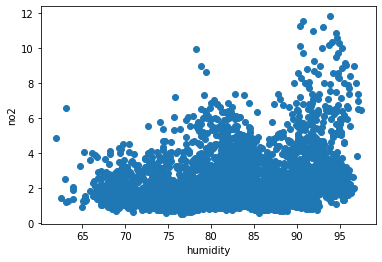

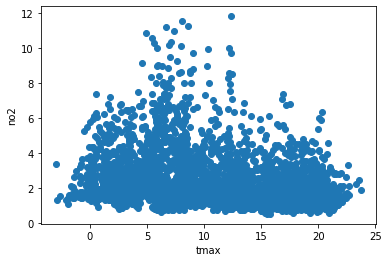

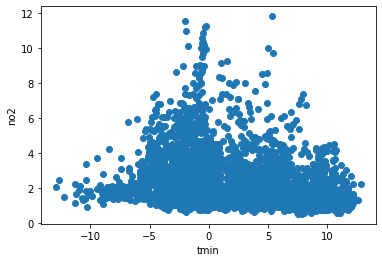

In [151]:
features=dff.drop(columns=['no2','o3','so2','pm10','co','pm2.5','wind','tysk','lat','lon','opady','hum','tmax','tmin','time'],axis=1)
Y = dff['no2']
X = dff['hum']
plt.scatter(X, Y)
plt.xlabel('humidity')
plt.ylabel("no2")
plt.show()
Y = dff['no2']
X = dff['tmax']
plt.scatter(X, Y)
plt.xlabel('tmax')
plt.ylabel("no2")
plt.show()
Y = dff['no2']
X = dff['tmin']
plt.scatter(X, Y)
plt.xlabel('tmin')
plt.ylabel("no2")
plt.show()


In [162]:
coordinates=['time','lon','lat','hum','tmax','tmin','opady','tysk','wind']
elem=['no2','o3','so2','pm10','co','pm2.5']

def regretion(dependent,independent):
    print(dependent,independent)
    x = np.array(dff[dependent]).reshape((-1, 1))
    y = np.array(dff[independent])
    #linaer 1
    X_train,X_test,Y_train,Y_test = train_test_split (x,y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')
    #arrays for other regressions
    x_ln=np.log(x)
    x_ln.reshape((-1,1))
    x_1x=1/(x)
    x_1x.reshape((-1,1))
    y_ln=np.log(y)
    y_1y=1/(y)
    #2
    X_train,X_test,Y_train,Y_test = train_test_split (x,y_1y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')
    #3
    X_train,X_test,Y_train,Y_test = train_test_split (x,y_ln,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')
    #4
    X_train,X_test,Y_train,Y_test = train_test_split (x_1x,y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')
    #5

    X_train,X_test,Y_train,Y_test = train_test_split (x_1x,y_1y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')
    #6
    X_train,X_test,Y_train,Y_test = train_test_split (x_1x,y_ln,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')
    #7
    X_train,X_test,Y_train,Y_test = train_test_split (x_ln,y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')
    #8
    X_train,X_test,Y_train,Y_test = train_test_split (x_ln,y_1y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')
    #9
    X_train,X_test,Y_train,Y_test = train_test_split (x_ln,y_ln,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')
    #10 polinom 2 x y
    print('poli 2 y')
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    print('\n')
    #11 polinom 3 x y
    print('poli 3 y')
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    print('\n')
    #12 poli 2 x lny
    print('poli 2 ln y')
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y_ln, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    print('\n')
    #13 poli 3 x lny
    print('poli 3 ln y')
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y_ln, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    print('\n')
    print('bla')
    print('\n')
for i in range(4):
    regretion(coordinates[i],elem[0])


time no2
r-squered for train 0.17056870263622503
r-squered for test 0.1816767764382149


r-squered for train 0.21424127436108198
r-squered for test 0.22923930937262016


r-squered for train 0.21204843571085663
r-squered for test 0.23027639000492184


r-squered for train 0.06688733448544404
r-squered for test 0.03791643656750865


r-squered for train 0.05559075025061633
r-squered for test 0.04459260658563535


r-squered for train 0.06675269171998488
r-squered for test 0.04811087346636078


r-squered for train 0.17263136967592085
r-squered for test 0.15963224049336666


r-squered for train 0.1740107602887636
r-squered for test 0.17328682918855753


r-squered for train 0.18977976815448305
r-squered for test 0.18729682490795252


poli 2 y
r-squered for train 0.1738755601868257
r-squered for test 0.1808368055911309


poli 3 y
r-squered for train 0.17820284086371851
r-squered for test 0.18041591362092968


poli 2 ln y
r-squered for train 0.2121540204271397
r-squered for test 0.22992236531001

In [164]:
def regretion2(dependent,independent):
    print(dependent,independent)
    x = np.array(dff[dependent]).reshape((-1, 1))
    y = np.array(dff[independent])
    #linaer 1
    X_train,X_test,Y_train,Y_test = train_test_split (x,y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')

    #arrays for other regressions

    y_ln=np.log(y)
    y_1y=1/(y)
    #2
    X_train,X_test,Y_train,Y_test = train_test_split (x,y_1y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')
    #3
    X_train,X_test,Y_train,Y_test = train_test_split (x,y_ln,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    print('\n')
    #10 polinom 2 x y
    print('poli 2  y')
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    print('\n')
    #11 polinom 3 x y
    print('poli 3  y')
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    print('\n')
    #12 poli 2 x lny
    print('poli 2 ln y')
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y_ln, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    print('\n')
    #13 poli 3 x lny
    print('poli 3 ln y')
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y_ln, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    print('\n')
    print('bla')
    print('\n')
regretion2(coordinates[4],elem[0])
regretion2(coordinates[5],elem[0])

tmax no2
r-squered for train 0.07258509565460125
r-squered for test 0.09348346279917152


r-squered for train 0.10514585177070135
r-squered for test 0.12388510614356096


r-squered for train 0.0998095651434261
r-squered for test 0.1247121051210267


poli 2  y
r-squered for train 0.08539698677711605
r-squered for test 0.11151713821674303


poli 3  y
r-squered for train 0.10647663011694308
r-squered for test 0.1218610429500977


poli 2 ln y
r-squered for train 0.10725761926871336
r-squered for test 0.13700441707488287


poli 3 ln y
r-squered for train 0.12571355005542317
r-squered for test 0.1421944224507199


bla


tmin no2
r-squered for train 0.055596057997782555
r-squered for test 0.07296011147373316


r-squered for train 0.09218655450584001
r-squered for test 0.11731028325676884


r-squered for train 0.08123816297696784
r-squered for test 0.1077164496277796


poli 2  y
r-squered for train 0.07646473640410012
r-squered for test 0.09177989415247656


poli 3  y
r-squered for train 0.082